# Spam and Ham Prediciton

**Data Understanding**

https://www.kaggle.com/venky73/spam-mails-dataset

Do text exploration for spam_ham dataset

* Make a model to predict whether an email is spam email or not.
* Define appropriate metrics.
* Look for the best model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [2]:
df=pd.read_csv('spam_ham_dataset.csv').drop(columns='Unnamed: 0')

In [3]:
df

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


## Preprocessing

In [4]:
from string import punctuation
import re
import nltk
from nltk.corpus import stopwords

In [5]:
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}


In [6]:
def to_lower(text):
    return text.lower()

def expand_contraction(text, contractions_dict):
    contractions_pattern= re.compile('({})'.format('|'.join(contractions_dict.keys())), 
                                     flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match=contraction.group(0)
        first_char=match[0]
        expanded_contraction= contractions_dict.get(match) \
            if contractions_dict.get(match)\
            else contractions_dict.get(match.lower())
        expanded_contraction= expanded_contraction
        return expanded_contraction
    
    expanded_text= contractions_pattern.sub(expand_match, text)
    expanded_text= re.sub("'","", expanded_text)
    return expanded_text

def main_contraction(text):
    text= expand_contraction(text,contractions_dict)
    return text

def remove_number(text):
    output=''.join(c for c in text if not c.isdigit())
    return output

def remove_punc(text):
    return ''.join(c for c in text if c not in punctuation)

def to_strip(text):
    return ' '.join(text.split())

def remove_stopwords(text):
    stop_word=stopwords.words('english')
    return ' '.join(w for w in nltk.word_tokenize(text) if not w in stop_word)

There are 6 initial stages to change the text so that each text has the same format, which is easy to process by the model :
1. we use lower() function to make all words lowercase
2. main contraction to make words that are shortened or combined into separate based on the contraction dict
3. remove number to make words without any number because text mining cannot read a number
4. remove punc to throw away a special character
5. to strip to throw away a double space
6. remove stopwords (english) to throw away a useless words

In [7]:
df['prep1']=df['text'].apply(to_lower)
df['prep2']=df['prep1'].apply(main_contraction)
df['prep3']=df['prep2'].apply(remove_number)
df['prep4']=df['prep3'].apply(remove_punc)
df['prep5']=df['prep4'].apply(to_strip)
df['prep6']=df['prep5'].apply(remove_stopwords)

In [8]:
pd.options.display.max_colwidth=None
df

,label,text,label_num,prep1,prep2,prep3,prep4,prep5,prep6
0,ham,"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .",0,"subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .","subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .","subject: enron methanol ; meter # : \r\nthis is a follow up to the note i gave you on monday , / / { preliminary\r\nflow data provided by daren } .\r\nplease override pop s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .",subject enron methanol meter \r\nthis is a follow up to the note i gave you on monday preliminary\r\nflow data provided by daren \r\nplease override pop s daily volume presently zero to reflect daily\r\nactivity you can obtain from gas control \r\nthis change is needed asap for economics purposes,subject enron methanol meter this is a follow up to the note i gave you on monday preliminary flow data provided by daren please override pop s daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes,subject enron methanol meter this is a follow up to the note i gave you on monday preliminary flow data provided by daren please override pop s daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls",0,"subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls","subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls","subject: hpl nom for january , \r\n( see attached file : hplnol . xls )\r\n- hplnol . xls",subject hpl nom for january \r\n see attached file hplnol xls \r\n hplnol xls,subject hpl nom for january see attached file hplnol xls hplnol xls,subject hpl nom for january see attached file hplnol xls hplnol xls
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !\r\ni know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .\r\non the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about .\r\ni think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up with a potential alternative for how we can get together on that weekend , and then you can let me k

## Stemming

change every verb 2 or verb 3 words into a verb 1 or base word

In [9]:
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [10]:
stemmer= SnowballStemmer('english')

def stem(text):
    stem_words=[stemmer.stem(words) for sent in nltk.sent_tokenize(text) for words in nltk.word_tokenize(sent)]
    return " ".join(stem_words)

lemma=WordNetLemmatizer()

def lemmatize(text):
    lemmatize_words=[lemma.lemmatize(words) for sent in nltk.sent_tokenize(text) for words in nltk.word_tokenize(sent)]
    return ' '.join(lemmatize_words)

In [11]:
df['stem']=df['prep6'].apply(stem)
df['lemma']=df['prep6'].apply(lemmatize)

In [12]:
df[['prep6','stem','lemma']]

,prep6,stem,lemma
0,subject enron methanol meter this is a follow up to the note i gave you on monday preliminary flow data provided by daren please override pop s daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes,subject enron methanol meter this is a follow up to the note i gave you on monday preliminari flow data provid by daren pleas overrid pop s daili volum present zero to reflect daili activ you can obtain from gas control this chang is need asap for econom purpos,subject enron methanol meter this is a follow up to the note i gave you on monday preliminary flow data provided by daren please override pop s daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purpose
1,subject hpl nom for january see attached file hplnol xls hplnol xls,subject hpl nom for januari see attach file hplnol xls hplnol xls,subject hpl nom for january see attached file hplnol xl hplnol xl
2,subject neon retreat ho ho ho we re around to that most wonderful time of the year neon leaders retreat time i know that this time of year is extremely hectic and that it s tough to think about anything past the holidays but life does go on past the week of december through january and that s what i d like you to think about for a minute on the calender that i handed out at the beginning of the fall semester the retreat was scheduled for the weekend of january but because of a youth ministers conference that brad and dustin are connected with that week we re going to change the date to the following weekend january now comes the part you need to think about i think we all agree that it s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester but it can be a lot of trouble and difficult for us to get away without kids etc so brad came up with a potential alternative for how we can get together on that weekend and then you can let me know which you prefer the first option would be to have a retreat similar to what we ve done the past several years this year we could go to the heartland country inn www com outside of brenham it s a nice place where we d have a bedroom and a bedroom house side by side it s in the country real relaxing but also close to brenham and only about one hour and minutes from here we can golf shop in the antique and craft stores in brenham eat dinner together at the ranch and spend time with each other we d meet on saturday and then return on sunday morning just like what we ve done in the past the second option would be to stay here in houston have dinner together at a nice restaurant and then have dessert and a time for visiting and recharging at one of our homes on that saturday evening this might be easier but the trade off would be that we wouldn t have as much time together i ll let you decide email me back with what would be your preference and of course if you re available on that weekend the democratic process will prevail majority vote will rule let me hear from you as soon as possible preferably by the end of the weekend and if the vote doesn t go your way no complaining allowed like i tend to do have a great weekend great golf great fishing great shopping or whatever makes you happy bobby,subject neon retreat ho ho ho we re around to that most wonder time of the year neon leader retreat time i know that this time of year is extrem hectic and that it s tough to think about anyth past the holiday but life doe go on past the week of decemb through januari and that s what i d like you to think about for a minut on the calend that i hand out at the begin of the fall semest the retreat was schedul for the weekend of januari but becaus of a youth minist confer that brad and dustin are connect with that week we re go to chang the date to the follow weekend januari now come the part you need to think about i th

# Word Frequency

In [13]:
def kamus(check):
    check= check.str.extractall('([a-zA-Z]+)')
    check.columns=['check']
    b=check.reset_index(drop=True)
    check=b['check'].value_counts()
    
    kamus={'kata':check.index,
          'freq':check.values}
    kamus=pd.DataFrame(kamus)
    kamus.index=kamus['kata']
    kamus.drop('kata',axis=1,inplace=True)
    kamus.sort_values('freq',ascending=False,inplace=True)
    return kamus

In [21]:
kamus_clean=kamus(df['lemma'])

<AxesSubplot:ylabel='kata'>

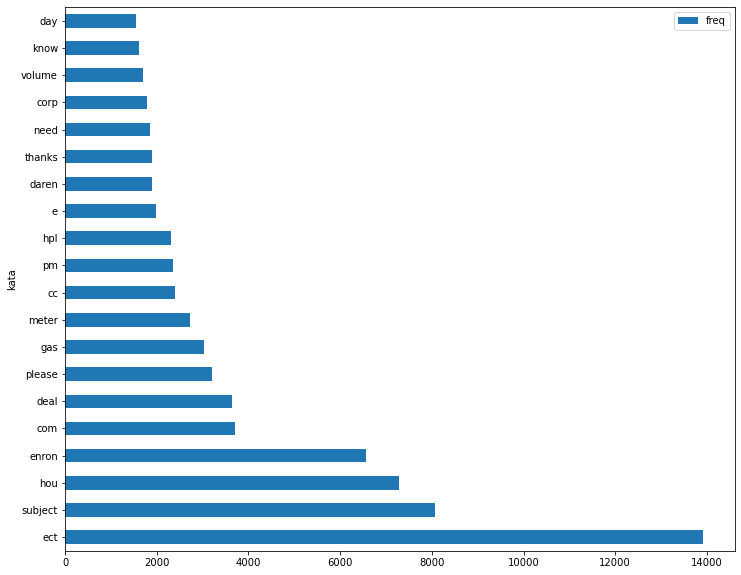

In [22]:
kamus_clean[:20].plot(kind='barh',figsize=(12,10))

## Word Cloud

In [23]:
from wordcloud import WordCloud

In [24]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis('off')

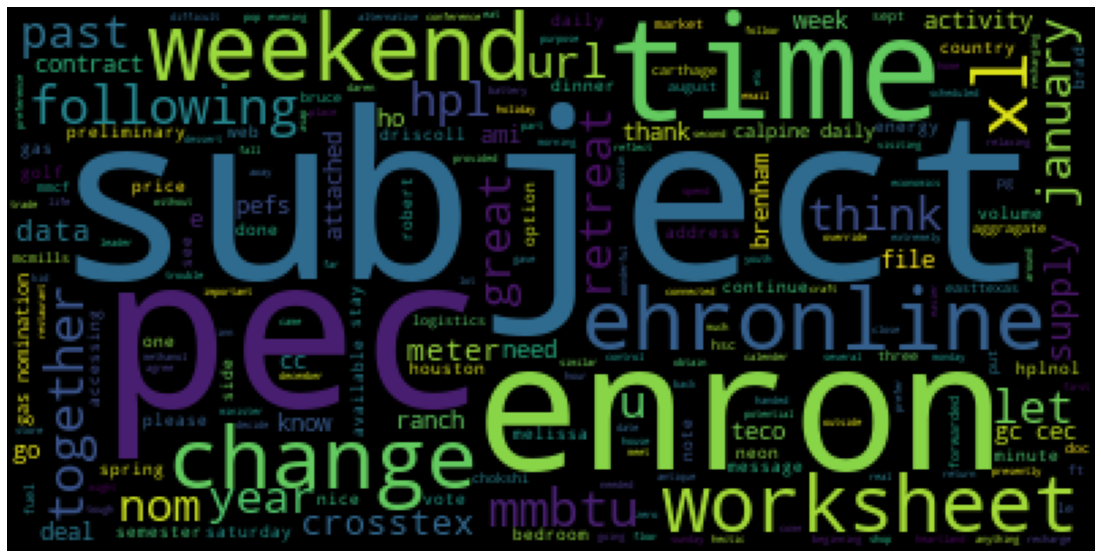

In [29]:
word_cloud=WordCloud().generate(str(df[df['label']=='ham']['lemma']))
plot_cloud(word_cloud)

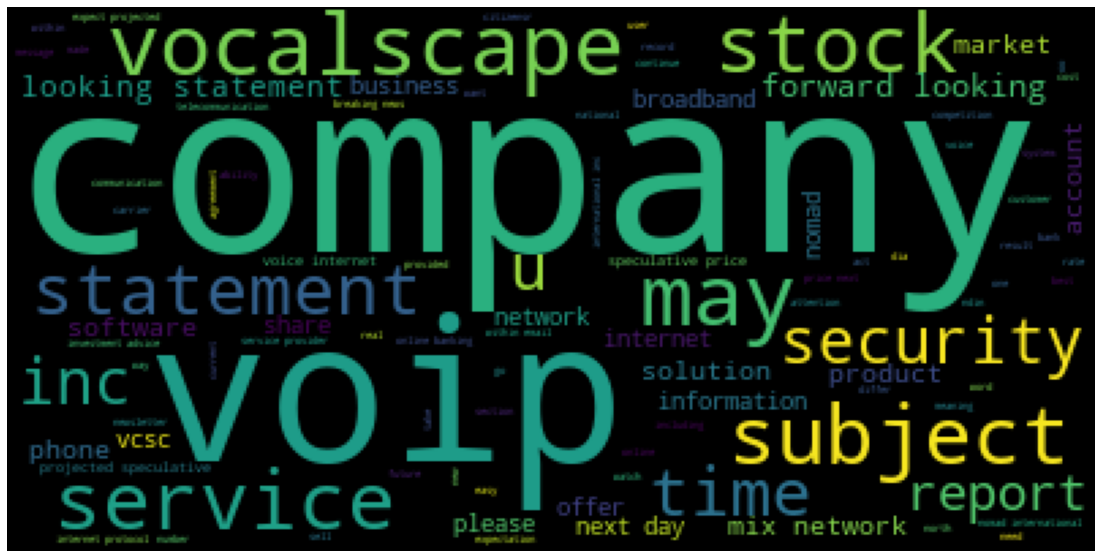

In [30]:
word_cloud=WordCloud().generate(str(df[df['label']=='spam']['lemma']))
plot_cloud(word_cloud)

# Splitting

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
text=df['lemma']
y=df['label_num']

In [16]:
text_train, text_test,y_train,y_test=train_test_split(text,y,stratify=y,random_state=2020)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [104]:
tfid=TfidfVectorizer()

tree=DecisionTreeClassifier(max_depth=3)
pipe_tree=Pipeline([
    ('preprocess',tfid),
    ('model',tree)
])

logreg= LogisticRegression(max_iter=1000)
pipe_logreg=Pipeline([
    ('preprocess',tfid),
    ('model',logreg)
])

knn=KNeighborsClassifier()
pipe_knn=Pipeline([
    ('preprocess',tfid),
    ('model',knn)
])

forest=RandomForestClassifier(max_depth=3)
pipe_forest=Pipeline([
    ('preprocess',tfid),
    ('model',forest)
])

In [105]:
skfold=StratifiedKFold(n_splits=5)
models=[pipe_tree,pipe_logreg,pipe_knn,pipe_forest]
score=[]
mean=[]
std=[]

for i in models:
    model_cv= cross_val_score(i,text_train,y_train,cv=skfold)
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({
    'model':['tree','logreg','knn','forest'],
    'mean':mean,
    'std':std
})

,model,mean,std
0,tree,0.808653,0.019508
1,logreg,0.981946,0.006327
2,knn,0.958483,0.004923
3,forest,0.724083,0.003448


In [106]:
vect=CountVectorizer()

tree=DecisionTreeClassifier(max_depth=3)
pipe_tree=Pipeline([
    ('preprocess',vect),
    ('model',tree)
])

logreg= LogisticRegression(max_iter=1000)
pipe_logreg=Pipeline([
    ('preprocess',vect),
    ('model',logreg)
])

knn=KNeighborsClassifier()
pipe_knn=Pipeline([
    ('preprocess',vect),
    ('model',knn)
])

forest=RandomForestClassifier(max_depth=3)
pipe_forest=Pipeline([
    ('preprocess',vect),
    ('model',forest)
])

In [107]:
skfold=StratifiedKFold(n_splits=5)
models=[pipe_tree,pipe_logreg,pipe_knn,pipe_forest]
score=[]
mean=[]
std=[]

for i in models:
    model_cv= cross_val_score(i,text_train,y_train,cv=skfold)
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({
    'model':['tree','logreg','knn','forest'],
    'mean':mean,
    'std':std
})

,model,mean,std
0,tree,0.790090,0.014234
1,logreg,0.972403,0.009229
2,knn,0.824900,0.021134
3,forest,0.722021,0.003038


In [90]:
vect=CountVectorizer(ngram_range=(1,2))

tree=DecisionTreeClassifier(max_depth=3)
pipe_tree=Pipeline([
    ('preprocess',vect),
    ('model',tree)
])

logreg= LogisticRegression(max_iter=1000)
pipe_logreg=Pipeline([
    ('preprocess',vect),
    ('model',logreg)
])

knn=KNeighborsClassifier()
pipe_knn=Pipeline([
    ('preprocess',vect),
    ('model',knn)
])

forest=RandomForestClassifier(max_depth=3)
pipe_forest=Pipeline([
    ('preprocess',vect),
    ('model',forest)
])

In [91]:
skfold=StratifiedKFold(n_splits=5)
models=[pipe_tree,pipe_logreg,pipe_knn,pipe_forest]
score=[]
mean=[]
std=[]

for i in models:
    model_cv= cross_val_score(i,text_train,y_train,cv=skfold)
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({
    'model':['tree','logreg','knn','forest'],
    'mean':mean,
    'std':std
})

,model,mean,std
0,tree,0.790090,0.013993
1,logreg,0.974211,0.007397
2,knn,0.695714,0.012461
3,forest,0.724600,0.002136


In [98]:
tfid=TfidfVectorizer(ngram_range=(1,2))

tree=DecisionTreeClassifier(max_depth=3)
pipe_tree=Pipeline([
    ('preprocess',tfid),
    ('model',tree)
])

logreg= LogisticRegression(max_iter=1000)
pipe_logreg=Pipeline([
    ('preprocess',tfid),
    ('model',logreg)
])

knn=KNeighborsClassifier()
pipe_knn=Pipeline([
    ('preprocess',tfid),
    ('model',knn)
])

forest=RandomForestClassifier(max_depth=3)
pipe_forest=Pipeline([
    ('preprocess',tfid),
    ('model',forest)
])

In [99]:
skfold=StratifiedKFold(n_splits=5)
models=[pipe_tree,pipe_logreg,pipe_knn,pipe_forest]
score=[]
mean=[]
std=[]

for i in models:
    model_cv= cross_val_score(i,text_train,y_train,cv=skfold)
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({
    'model':['tree','logreg','knn','forest'],
    'mean':mean,
    'std':std
})

,model,mean,std
0,tree,0.790606,0.013925
1,logreg,0.978851,0.006465
2,knn,0.966478,0.004075
3,forest,0.723569,0.002905


* Tfid : 98.1%
* Vect : 97.6%
* Tfid Ngrams : 97.8%
* Vect Ngrams : 97.4%

the validation results show the logreg model that has the largest average and is quite stable, and the metrics chosen are Tfid Vectorizer without ngrams because it produces a higher score

## Data Test Performance With Tf-IDF

In [67]:
tfidf=TfidfVectorizer()
model=LogisticRegression()
pipe=Pipeline([
    ('preprocess',tfidf),
    ('model',model)
])

In [68]:
hyperparam_space={'model__C':[0.001,0.01,0.1,1,10]}

In [69]:
grid=GridSearchCV(pipe, hyperparam_space, cv=StratifiedKFold(n_splits=5))

In [70]:
grid.fit(text_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess', TfidfVectorizer()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10]})

In [71]:
print(grid.best_score_, grid.best_params_)

0.9834945128034587 {'model__C': 10}


### Before After

In [76]:
# before
tfidf=TfidfVectorizer()
model=LogisticRegression()
pipe=Pipeline([
    ('preprocess',tfidf),
    ('model',model)
])
pipe.fit(text_train,y_train)
y_pred= pipe.predict(text_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       918
           1       0.97      0.99      0.98       375

    accuracy                           0.99      1293
   macro avg       0.98      0.99      0.99      1293
weighted avg       0.99      0.99      0.99      1293



In [77]:
# after
best_model=grid.best_estimator_.fit(text_train,y_train)
y_pred= best_model.predict(text_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       918
           1       0.97      0.99      0.98       375

    accuracy                           0.99      1293
   macro avg       0.98      0.99      0.99      1293
weighted avg       0.99      0.99      0.99      1293

